<a href="https://colab.research.google.com/github/llu13701/cm1_python_test/blob/main/CM1_DevQuickTest_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Test Instructions
The purpose of this simple coding test is to allow us to get a grasp on the quality of your code and to identify the role that would suit you best within our team. You don't NEED to be able to answer all of the items, but the ones that you do answer need to be correct. Feel free to use Google or any other tools that you prefer to complete these tasks.

Install any needed third-party libraries below this block. Please install the minimum amount of libraries you need.

!pip install whatever_you_need

In [ ]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 2.9 MB/s eta 0:00:00


In [ ]:
pip install jinja2

In [ ]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.5 MB/s eta 0:00:00


### Task 1 (Data manipulation / Visualization)
Download the file: https://drive.google.com/file/d/1R_M3xI3b_BqAN_xWLqJDneg273X_sok5/view?usp=sharing

In `message_data.csv` there's two columns, one corresponds to the unique id of someone sending a message and the other one to when they sent it.

Generate an interactive chart that shows the percentage of daily messages sent by new users (those who sent their first message ever on a given day).

In [ ]:
import pandas as pd
import plotly.express as px

# Read the data from CSV
df = pd.read_csv('/content/message_data.csv')

# Convert 'message_time' column to datetime
df['message_time'] = pd.to_datetime(df['message_time'])

# Calculate the count of new users by day
df['date'] = df['message_time'].dt.date
new_users = df[df.groupby('author_id')['message_time'].transform('min').dt.date == df['date']]
new_users_count = new_users.groupby('date').size().reset_index(name='new_users')

# Calculate the total messages by day
total_messages = df.groupby('date').size().reset_index(name='total_messages')

# Merge new users and total messages dataframes
merged_df = pd.merge(new_users_count, total_messages, on='date')

# Calculate the percentage of messages sent by new users
merged_df['percentage'] = (merged_df['new_users'] / merged_df['total_messages']) * 100

# Generate interactive chart using Plotly
fig = px.line(merged_df, x='date', y='percentage', title='Percentage of Daily Messages by New Users')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Percentage')
fig.show()


### Task 2 (Django)
**To take the django portion of this test go to: https://github.com/llu13701/cm1_python_test and follow the instructions.**

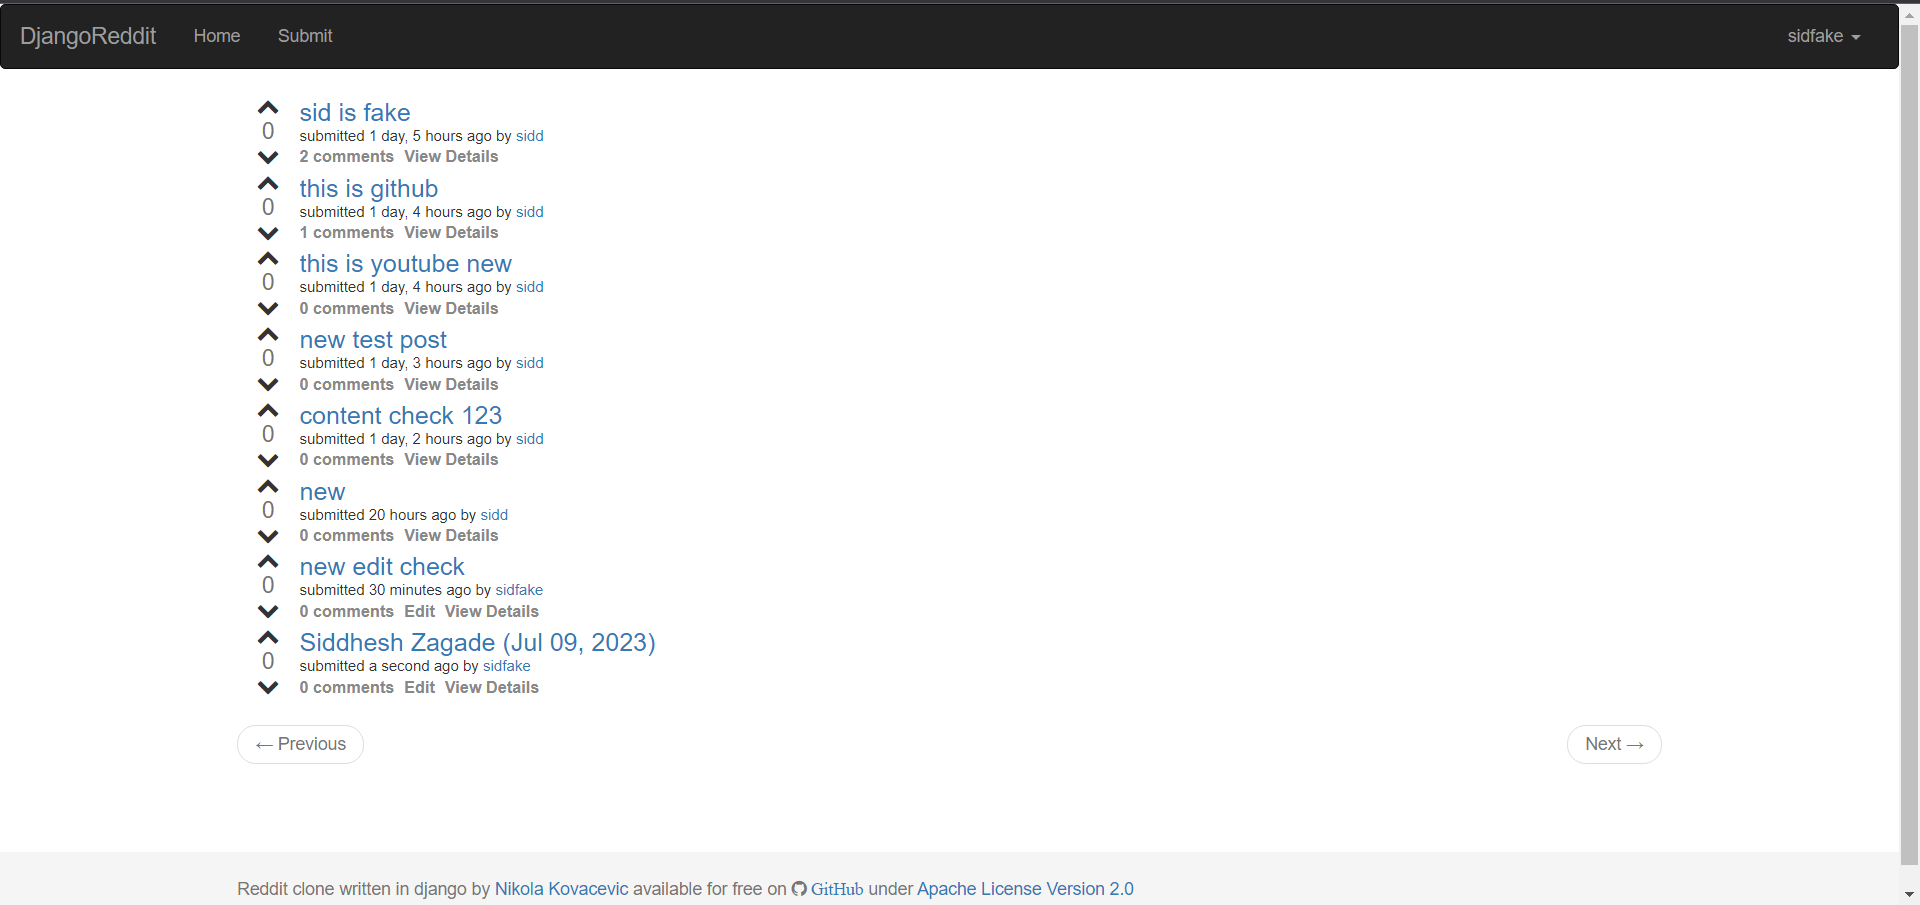


https://www.loom.com/share/ae016cf92e2c444db64241812513235b?sid=6ef54a0f-01c8-4a28-a096-8ea47c04593d

### Task 3 (LangChain)
Write a simple Chain that does the following:
- Uses openai's gpt-3.5-turbo model.
- Remembers the last 2 message exchanges, as well as the system message.
- Greets people and tells a joke about their name.

In [ ]:
import langchain

from langchain.cache import InMemoryCache
langchain.llm_cache = InMemoryCache()
from langchain.chat_models import ChatOpenAI

chat = ChatOpenAI(openai_api_key="")

from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)


In [ ]:
openai_api_key=""
from langchain import PromptTemplate
from langchain.prompts import (
    ChatPromptTemplate,
    MessagesPlaceholder,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate
)
from langchain.chains import ConversationChain
from langchain.chat_models import ChatOpenAI
from langchain.memory import ConversationBufferMemory

prompt = ChatPromptTemplate.from_messages([
    SystemMessagePromptTemplate.from_template(
        "The following is a friendly conversation between a human and an AI. The AI is talkative and "
        "provides lots of specific details from its context. If the AI does not know the answer to a "
        "question, it truthfully says it does not know.It also tell a joke using their name"
    ),
    MessagesPlaceholder(variable_name="history"),
    HumanMessagePromptTemplate.from_template("{input}")
])

llm = ChatOpenAI(openai_api_key="",temperature=0,model_name="gpt-3.5-turbo")
memory = ConversationBufferMemory(return_messages=True)
conversation = ConversationChain(memory=memory, prompt=prompt, llm=llm)
name = input("Please enter your name: ")
conversation.predict(input =f"Hi my name is {name}")
print(f"AI: Nice to meet you, {name}! Now, let me come up with a personalized joke just for you.")

# Generate a joke using the entered name


x = conversation.predict(input =f"Tell me a joke using {name}")

print("AI:", x)
print("AI: Now, let's continue our conversation.")

while True:
    z = input()
    if z.lower() == "bye":
        print("AI: Goodbye!")
        break
    g = conversation.predict(input=z)
    print("AI:", g)

Please enter your name: sid
AI: Nice to meet you, sid! Now, let me come up with a personalized joke just for you.
AI: Sure, Sid! Here's a joke just for you:

Why did Sid bring a ladder to the bar?

Because he heard the drinks were on the house!
AI: Now, let's continue our conversation.
what is full form of wyd
AI: The full form of "WYD" is "What are you doing?". It's a commonly used abbreviation in text messaging and online chats. So, if someone asks you "WYD?", they are asking about your current activities or what you are up to at that moment.
what is my name
AI: Your name is Sid. You mentioned it at the beginning of our conversation. Is there anything else I can help you with, Sid?
bye
AI: Goodbye!


### Task 4 (Discord API)

Write a very simple discord bot that says "Hello {user_name}!" to every new incoming message in a discord server.


https://discord.gg/8vRxW7rV5 both task 4 and 5 here ! Did task 5 similarily to task 3

### Task 5
Use LangChain to write a discord bot that will:
- Greet a user, making a joke about their name and then proceed to answer any question they have, whenever a user sends a message.
- Use async with langchain chain calls.
